<a href="https://colab.research.google.com/github/dvstar22/data_analysis/blob/main/taxi_testcase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Мой канал в телеге https://t.me/mikhaylovgleb

The key aspect of ride-hailing is the price. It relies on technology to collect accurate tracking data so that a fair price can be calculated at the end of the trip. Fortunately, our riders are quick to tell us when they overpaid and we can use that feedback to improve our product.

Please analyze the dataset to identify top opportunities for reducing the number of overcharge tickets and present your results. Please provide us with a PDF file/document with the findings. Finally, you shouldn’t spend more than 8 hours on this analysis.

 Variables in the file:

order_id_new, order_try_id_new - id of an order

calc_created- time when the order was created

metered_price, distance, duration- actual price, distance and duration of a ride

upfront_price- promised to the rider price, based on predicted duration (predicted_duration) and distance (predicted_distance)

distance - ride distance

duration - ride duration

gps_confidence- indicator for good GPS connection (1 - good one, 0 - bad one)

entered_by- who entered the address

b_state- state of a ride (finished implies that the ride was actually done)

dest_change_number- number of destination changes by a rider

predicted distance - predicted duration of a ride based on the pickup and dropoff points entered by the rider requesting a car

predicted duration - predicted duration of a ride based on the pickup and dropoff points entered by the rider requesting a car

prediction_price_type- internal variable for the type of prediction:

upfront, prediction - prediction happened before the ride

upfront_destination_changed - prediction happened after rider changed destination during the ride

change_reason_pricing - records due to whose action the price changed

ticket_id_new - id for customer support ticket

https://drive.google.com/file/d/1ZNLnbwS3hnhjy3_6CYBcSu_72PCEcnVd/view?usp=sharing

In [ ]:
! gdown --id 1ZNLnbwS3hnhjy3_6CYBcSu_72PCEcnVd

Downloading...
From: https://drive.google.com/uc?id=1ZNLnbwS3hnhjy3_6CYBcSu_72PCEcnVd
To: /content/Analytical_Task_2 (taxi startup).csv
100% 792k/792k [00:00<00:00, 49.5MB/s]


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('Analytical_Task_2 (taxi startup).csv')

In [ ]:
df.head()

,order_id_new,order_try_id_new,calc_created,metered_price,upfront_price,distance,duration,gps_confidence,entered_by,b_state,dest_change_number,prediction_price_type,predicted_distance,predicted_duration,change_reason_pricing,ticket_id_new,device_token,rider_app_version,order_state,order_try_state,driver_app_version,driver_device_uid_new,device_name,eu_indicator,overpaid_ride_ticket,fraud_score
0,22,22,2020-02-02 3:37:31,4.04,10.0,2839,700,1,client,finished,1,upfront,13384.0,1091.0,NaN,1376,NaN,CI.4.17,finished,finished,DA.4.37,1596,Xiaomi Redmi 6,1,0,-1383.0
1,618,618,2020-02-08 2:26:19,6.09,3.6,5698,493,1,client,finished,1,upfront,2286.0,360.0,NaN,2035,NaN,CA.5.43,finished,finished,DA.4.39,1578,Samsung SM-G965F,1,0,NaN
2,657,657,2020-02-08 11:50:35,4.32,3.5,4426,695,1,client,finished,1,upfront,4101.0,433.0,NaN,2222,NaN,CA.5.43,finished,finished,DA.4.37,951,Samsung SM-A530F,1,0,-166.0
3,313,313,2020-02-05 6:34:54,72871.72,NaN,49748,1400,0,client,finished,2,upfront_destination_changed,3017.0,600.0,client_destination_changed,1788,NaN,CA.5.23,finished,finished,DA.4.37,1587,TECNO-Y6,0,1,NaN
4,1176,1176,2020-02-13 17:31:24,20032.50,19500.0,10273,5067,1,client,finished,1,upfront,14236.0,2778.0,NaN,2710,NaN,CA.5.04,finished,finished,DA.4.37,433,Itel W5504,0,0,NaN


In [ ]:
df.columns

Index(['order_id_new', 'order_try_id_new', 'calc_created', 'metered_price',
       'upfront_price', 'distance', 'duration', 'gps_confidence', 'entered_by',
       'b_state', 'dest_change_number', 'prediction_price_type',
       'predicted_distance', 'predicted_duration', 'change_reason_pricing',
       'ticket_id_new', 'device_token', 'rider_app_version', 'order_state',
       'order_try_state', 'driver_app_version', 'driver_device_uid_new',
       'device_name', 'eu_indicator', 'overpaid_ride_ticket', 'fraud_score'],
      dtype='object')

In [ ]:
df['overpaid_ride_ticket'].value_counts()

0    4606
1     337
Name: overpaid_ride_ticket, dtype: int64

In [ ]:
len(df)

4943

In [ ]:
2020-02-02 3:37:31

In [ ]:
df['calc_created'] = pd.to_datetime(df['calc_created'],format='%Y-%m-%d %H:%M:%S')

In [ ]:
df['calc_created'].agg(['min','max'])

min   2020-02-02 00:01:16
max   2020-03-13 23:52:07
Name: calc_created, dtype: datetime64[ns]

In [ ]:
df.isna().mean()

order_id_new             0.000000
order_try_id_new         0.000000
calc_created             0.000000
metered_price            0.004046
upfront_price            0.310338
distance                 0.000000
duration                 0.000000
gps_confidence           0.000000
entered_by               0.000000
b_state                  0.000000
dest_change_number       0.000000
prediction_price_type    0.004046
predicted_distance       0.004046
predicted_duration       0.004046
change_reason_pricing    0.939713
ticket_id_new            0.000000
device_token             1.000000
rider_app_version        0.003237
order_state              0.000000
order_try_state          0.000000
driver_app_version       0.000000
driver_device_uid_new    0.000000
device_name              0.000000
eu_indicator             0.000000
overpaid_ride_ticket     0.000000
fraud_score              0.558163
dtype: float64

In [ ]:
! pip install catboost

     |████████████████████████████████| 65.8MB 58kB/s 


In [ ]:
from catboost import CatBoostClassifier

In [ ]:
df['dt_unix'] = df['calc_created'].astype(int) / 10**9

In [ ]:
df = df[(~df['prediction_price_type'].isna())&(~df['rider_app_version'].isna())].copy()

In [ ]:
train = df.sample(frac=0.7,random_state=42).copy()

In [ ]:
val = df[~df.index.isin(train.index)].copy()

In [ ]:
len(train)

3446

In [ ]:
len(val)

1477

In [ ]:
len(train) + len(val)

4923

In [ ]:
len(df)

4923

In [ ]:
df.columns

Index(['order_id_new', 'order_try_id_new', 'calc_created', 'metered_price',
       'upfront_price', 'distance', 'duration', 'gps_confidence', 'entered_by',
       'b_state', 'dest_change_number', 'prediction_price_type',
       'predicted_distance', 'predicted_duration', 'change_reason_pricing',
       'ticket_id_new', 'device_token', 'rider_app_version', 'order_state',
       'order_try_state', 'driver_app_version', 'driver_device_uid_new',
       'device_name', 'eu_indicator', 'overpaid_ride_ticket', 'fraud_score',
       'dt_unix'],
      dtype='object')

In [ ]:
df.select_dtypes(include='object').columns

Index(['entered_by', 'b_state', 'prediction_price_type',
       'change_reason_pricing', 'rider_app_version', 'order_state',
       'order_try_state', 'driver_app_version', 'device_name'],
      dtype='object')

In [ ]:
X_col = ['order_id_new', 'order_try_id_new', 'metered_price',
       'upfront_price', 'distance', 'duration', 'gps_confidence', 'entered_by',
       'b_state', 'dest_change_number', 'prediction_price_type',
       'predicted_distance', 'predicted_duration',
       'ticket_id_new', 'device_token', 'rider_app_version', 'order_state',
       'order_try_state', 'driver_app_version', 'driver_device_uid_new',
       'device_name', 'eu_indicator', 'fraud_score',
       'dt_unix']
y_col = ['overpaid_ride_ticket']
cat_features = ['entered_by', 'b_state', 'prediction_price_type',
        'rider_app_version', 'order_state',
       'order_try_state', 'driver_app_version', 'device_name']

In [ ]:
model = CatBoostClassifier(learning_rate=0.005,
                           eval_metric='AUC',
                           cat_features=cat_features,verbose=100)

In [ ]:
model.fit(train[X_col],train[y_col],
          eval_set=(val[X_col],val[y_col]))

0:	test: 0.8134606	best: 0.8134606 (0)	total: 12.5ms	remaining: 12.5s
100:	test: 0.8488624	best: 0.8488912 (93)	total: 938ms	remaining: 8.35s
200:	test: 0.8575905	best: 0.8575905 (200)	total: 1.81s	remaining: 7.19s
300:	test: 0.8634117	best: 0.8634261 (298)	total: 2.83s	remaining: 6.56s
400:	test: 0.8649407	best: 0.8654732 (378)	total: 3.91s	remaining: 5.84s
500:	test: 0.8648040	best: 0.8655811 (458)	total: 5.07s	remaining: 5.05s
600:	test: 0.8648616	best: 0.8655811 (458)	total: 6.26s	remaining: 4.16s
700:	test: 0.8644010	best: 0.8655811 (458)	total: 7.49s	remaining: 3.2s
800:	test: 0.8645593	best: 0.8655811 (458)	total: 8.71s	remaining: 2.16s
900:	test: 0.8644694	best: 0.8655811 (458)	total: 9.94s	remaining: 1.09s
999:	test: 0.8648220	best: 0.8655811 (458)	total: 11.3s	remaining: 0us

bestTest = 0.8655811075
bestIteration = 458

Shrink model to first 459 iterations.


In [ ]:
model.predict_proba(val[X_col])

array([[0.98332747, 0.01667253],
       [0.83311298, 0.16688702],
       [0.93356112, 0.06643888],
       ...,
       [0.97939398, 0.02060602],
       [0.94535743, 0.05464257],
       [0.97954159, 0.02045841]])

In [ ]:
fi = pd.DataFrame({'feature':X_col,'fi':model.feature_importances_})

In [ ]:
fi.sort_values('fi',ascending=False)

,feature,fi
2,metered_price,13.985340
10,prediction_price_type,12.379858
21,eu_indicator,12.107867
22,fraud_score,8.901335
6,gps_confidence,7.448661
20,device_name,6.554602
5,duration,5.469510
3,upfront_price,5.262882
18,driver_app_version,4.596941
4,distance,4.086869


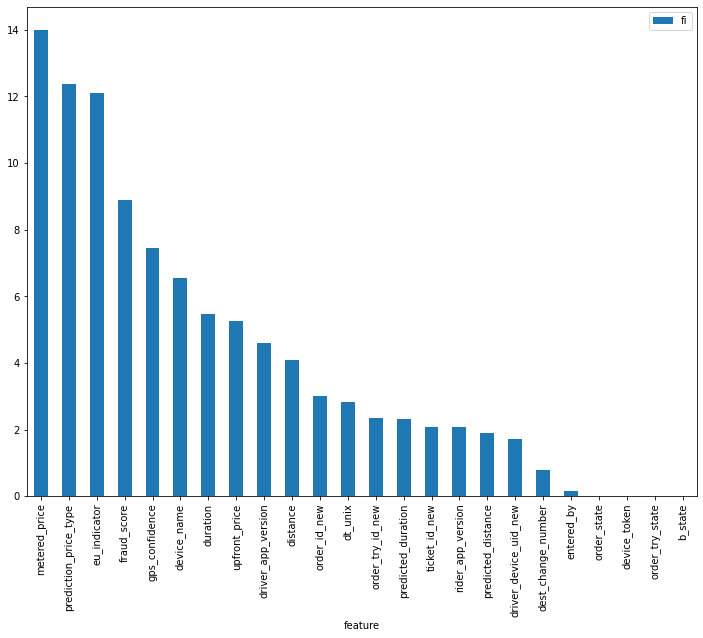

In [ ]:
fi.sort_values('fi',ascending=False).set_index('feature').plot(kind='bar',figsize=(12,9))

In [ ]:
df = pd.read_csv('Analytical_Task_2 (taxi startup).csv')
df['calc_created'] = pd.to_datetime(df['calc_created'],format='%Y-%m-%d %H:%M:%S')

In [ ]:
df['metered_price']

0           4.04
1           6.09
2           4.32
3       72871.72
4       20032.50
          ...   
4938       10.89
4939     8789.28
4940        7.50
4941        3.06
4942    29244.10
Name: metered_price, Length: 4943, dtype: float64

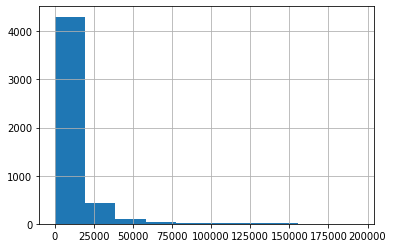

In [ ]:
df['metered_price'].hist()

In [ ]:
df['metered_price_bin'] = pd.qcut(df['metered_price'],5)

In [ ]:
df['overpaid_ride_ticket']

In [ ]:
df.groupby('metered_price_bin')['overpaid_ride_ticket'].agg(['count','mean'])

,count,mean
metered_price_bin,,
"(1.999, 4.72]",992,0.000000
"(4.72, 8.25]",978,0.005112
"(8.25, 6000.0]",1291,0.040279
"(6000.0, 13835.1]",677,0.138848
"(13835.1, 194483.52]",985,0.188832


In [ ]:
df.columns

Index(['order_id_new', 'order_try_id_new', 'calc_created', 'metered_price',
       'upfront_price', 'distance', 'duration', 'gps_confidence', 'entered_by',
       'b_state', 'dest_change_number', 'prediction_price_type',
       'predicted_distance', 'predicted_duration', 'change_reason_pricing',
       'ticket_id_new', 'device_token', 'rider_app_version', 'order_state',
       'order_try_state', 'driver_app_version', 'driver_device_uid_new',
       'device_name', 'eu_indicator', 'overpaid_ride_ticket', 'fraud_score',
       'dt_unix', 'meteted_price_bin', 'metered_price_bin'],
      dtype='object')

In [ ]:
df.groupby('prediction_price_type')['overpaid_ride_ticket'].agg(['count','mean'])

,count,mean
prediction_price_type,,
prediction,1279,0.173573
upfront,3432,0.032634
upfront_destination_changed,208,0.014423
upfront_waypoint_changed,4,0.000000


In [ ]:
df['eu_indicator']

0       1
1       1
2       1
3       0
4       0
       ..
4938    1
4939    0
4940    1
4941    1
4942    0
Name: eu_indicator, Length: 4923, dtype: int64

In [ ]:
df.groupby('eu_indicator')['overpaid_ride_ticket'].agg(['count','mean'])

,count,mean
eu_indicator,,
0,2173,0.149103
1,2750,0.004727


In [ ]:
df['fraud_score'].isna().mean()

0.5567743245988218

In [ ]:
df['fraud_score'] = df['fraud_score'].fillna(-9999)

In [ ]:
df['fraud_bin'] = pd.qcut(df['fraud_score'],5,duplicates='drop')

In [ ]:
df.groupby('fraud_bin')['overpaid_ride_ticket'].agg(['count','mean'])

,count,mean
fraud_bin,,
"(-14225.001, -9999.0]",2764,0.115774
"(-9999.0, -1850.0]",203,0.014778
"(-1850.0, -228.0]",988,0.007085
"(-228.0, 49.0]",988,0.007085


In [ ]:
df['gps_confidence']

0       1
1       1
2       1
3       0
4       1
       ..
4938    1
4939    0
4940    1
4941    1
4942    1
Name: gps_confidence, Length: 4943, dtype: int64

In [ ]:
df.groupby('gps_confidence')['overpaid_ride_ticket'].agg(['count','mean'])

,count,mean
gps_confidence,,
0,985,0.204061
1,3958,0.034361


In [ ]:
df['device_name']

0          Xiaomi Redmi 6
1        Samsung SM-G965F
2        Samsung SM-A530F
3                TECNO-Y6
4              Itel W5504
              ...        
4938       HUAWEI LYA-L29
4939     Samsung SM-G928F
4940       HUAWEI AMN-LX9
4941    TP-Link Neffos X1
4942     Samsung SM-A260F
Name: device_name, Length: 4943, dtype: object

In [ ]:
t = df.groupby('device_name')['overpaid_ride_ticket'].agg(['count','mean'])

In [ ]:
t

,count,mean
device_name,,
Alps F9 Pro,10,0.000000
Alps NODROPOUT T25,1,0.000000
Alps TECNO B1p,1,0.000000
Asus ASUS_A002,5,0.000000
Asus ASUS_X00TD,3,0.000000
...,...,...
"iPhone8,1",91,0.010989
"iPhone8,2",18,0.000000
"iPhone8,4",35,0.000000


In [ ]:
t.sort_values('mean',ascending=False)

,count,mean
device_name,,
TECNO-C7,1,1.0
Samsung GT-N7100,2,1.0
HTC U Ultra,1,1.0
TECNO-Y6,1,1.0
HTC One X10,1,1.0
...,...,...
LGE LG-K350,3,0.0
LGE LG-H990,1,0.0
LGE LG-H815,2,0.0


In [ ]:
def device_cat(device_name):
  if 'tecno' in device_name.lower():
    return 'tecno'
  if 'iphone' in device_name.lower():
    return 'iphone'
  if 'lg' in device_name.lower():
    return 'lg'
  if 'samsung' in device_name.lower():
    return 'samsung'
  if 'htc' in device_name.lower():
    return 'htc'
  if 'nokia' in device_name.lower():
    return 'nokia'
  if 'xiaomi'in device_name.lower():
    return 'xiaomi'
  if 'HUAWEI'.lower() in device_name.lower():
    return 'HUAWEI'.lower()
  return 'misc'

In [ ]:
df['device_group'] = df['device_name'].apply(device_cat)

In [ ]:
df.groupby('device_group')['overpaid_ride_ticket'].agg(['count','mean'])

,count,mean
device_group,,
htc,16,0.312500
huawei,724,0.019337
iphone,426,0.021127
lg,39,0.000000
misc,703,0.095306
nokia,158,0.113924
samsung,1683,0.038622
tecno,933,0.167203
xiaomi,261,0.011494


In [ ]:
df.groupby('device_group')['overpaid_ride_ticket'].agg(['count','mean']).sort_values('mean',ascending=False)

,count,mean
device_group,,
htc,16,0.312500
tecno,933,0.167203
nokia,158,0.113924
misc,703,0.095306
samsung,1683,0.038622
iphone,426,0.021127
huawei,724,0.019337
xiaomi,261,0.011494
lg,39,0.000000


In [ ]:
df[df['device_group'] == 'misc']['device_name'].value_counts()

Itel S12                                  50
Infinix X572                              33
INFINIX MOBILITY LIMITED Infinix X650B    32
HMD Global TA-1032                        27
INFINIX MOBILITY LIMITED Infinix X624B    25
                                          ..
WIKO U FEEL                                1
Alps NODROPOUT T25                         1
Infinix NOTE 3 Pro                         1
E1 Fero_X1                                 1
Sony D6603                                 1
Name: device_name, Length: 141, dtype: int64

In [ ]:
df['dur_bin'] = pd.qcut(df['duration'],5)

In [ ]:
df.groupby('dur_bin')['overpaid_ride_ticket'].agg(['count','mean'])

,count,mean
dur_bin,,
"(-0.001, 517.0]",992,0.033266
"(517.0, 863.0]",987,0.030395
"(863.0, 1304.0]",988,0.051619
"(1304.0, 2241.2]",987,0.105370
"(2241.2, 22402.0]",989,0.120324


In [ ]:
df

,order_id_new,order_try_id_new,calc_created,metered_price,upfront_price,distance,duration,gps_confidence,entered_by,b_state,dest_change_number,prediction_price_type,predicted_distance,predicted_duration,change_reason_pricing,ticket_id_new,device_token,rider_app_version,order_state,order_try_state,driver_app_version,driver_device_uid_new,device_name,eu_indicator,overpaid_ride_ticket,fraud_score,metered_price_bin,fraud_bin,device_group,dur_bin
0,22,22,2020-02-02 03:37:31,4.04,10.0,2839,700,1,client,finished,1,upfront,13384.0,1091.0,NaN,1376,NaN,CI.4.17,finished,finished,DA.4.37,1596,Xiaomi Redmi 6,1,0,-1383.0,"(1.999, 4.72]","(-1850.0, -228.0]",xiaomi,"(517.0, 863.0]"
1,618,618,2020-02-08 02:26:19,6.09,3.6,5698,493,1,client,finished,1,upfront,2286.0,360.0,NaN,2035,NaN,CA.5.43,finished,finished,DA.4.39,1578,Samsung SM-G965F,1,0,-9999.0,"(4.72, 8.25]","(-14225.001, -9999.0]",samsung,"(-0.001, 517.0]"
2,657,657,2020-02-08 11:50:35,4.32,3.5,4426,695,1,client,finished,1,upfront,4101.0,433.0,NaN,2222,NaN,CA.5.43,finished,finished,DA.4.37,951,Samsung SM-A530F,1,0,-166.0,"(1.999, 4.72]","(-228.0, 49.0]",samsung,"(517.0, 863.0]"
3,313,313,2020-02-05 06:34:54,72871.72,NaN,49748,1400,0,client,finished,2,upfront_destination_changed,3017.0,600.0,client_destination_changed,1788,NaN,CA.5.23,finished,finished,DA.4.37,1587,TECNO-Y6,0,1,-9999.0,"(13835.1, 194483.52]","(-14225.001, -9999.0]",tecno,"(1304.0, 2241.2]"
4,1176,1176,2020-02-13 17:31:24,20032.50,19500.0,10273,5067,1,client,finished,1,upfront,14236.0,2778.0,NaN,2710,NaN,CA.5.04,finished,finished,DA.4.37,433,Itel W5504,0,0,-9999.0,"(13835.1, 194483.52]","(-14225.001, -9999.0]",misc,"(2241.2, 22402.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4938,3513,3513,2020-03-07 17:42:34,10.89,13.7,15672,1449,1,client,finished,1,upfront,16172.0,1691.0,NaN,517,NaN,CA.5.45,finished,finished,DA.4.37,1612,HUAWEI LYA-L29,1,0,-286.0,"(8.25, 6000.0]","(-1850.0, -228.0]",huawei,"(1304.0, 2241.2]"
4939,2192,2192,2020-02-22 18:15:45,8789.28,NaN,5712,1173,0,client,finished,1,prediction,5712.0,1093.0,NaN,3861,NaN,CA.5.44,finished,finished,DA.4.37,859,Samsung SM-G928F,0,0,-9999.0,"(6000.0, 13835.1]","(-14225.001, -9999.0]",samsung,"(863.0, 1304.0]"
4940,4051,4051,2020-03-12 23:08:31,7.50,7.4,5303,486,1,client,finished,1,upfront,5141.0,498.0,NaN,1156,NaN,CA.5.45,finished,finished,DA.4.42,2061,HUAWEI AMN-LX9,1,0,-192.0,"(4.72, 8.25]","(-228.0, 49.0]",huawei,"(-0.001, 517.0]"
4941,3636,3636,2020-03-08 20:15:04,3.06,8.1,3528,338,1,client,finished,1,upfront,8143.0,768.0,NaN,651,NaN,CA.5.46,finished,finished,DA.4.39,2101,TP-Link Neffos X1,1,0,-228.0,"(1.999, 4.72]","(-1850.0, -228.0]",misc,"(-0.001, 517.0]"


In [ ]:
!pip install shap

     |████████████████████████████████| 358kB 5.5MB/s 
  Created wheel for shap: filename=shap-0.38.1-cp36-cp36m-linux_x86_64.whl size=489392 sha256=3780213cc7c6eb0986019693e8759ac755f73b7d7525b1d651a6759c46b2ec44
  Stored in directory: /root/.cache/pip/wheels/a8/fb/e4/88012be41842b9be62ae18d82d1b1e880daf8539d1fef1fa00
Successfully built shap


In [ ]:
import xgboost
import shap

# load JS visualization code to notebook
shap.initjs()

# train XGBoost model

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(train[X_col])

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[0,:], train[X_col].iloc[0,:])

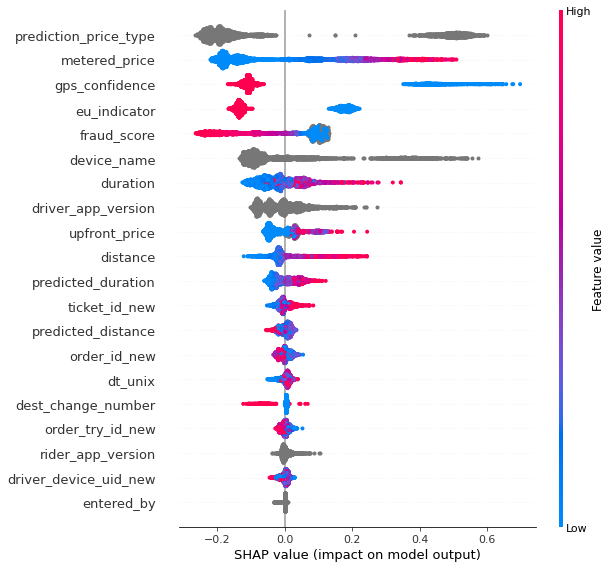

In [ ]:
shap.summary_plot(shap_values, train[X_col])


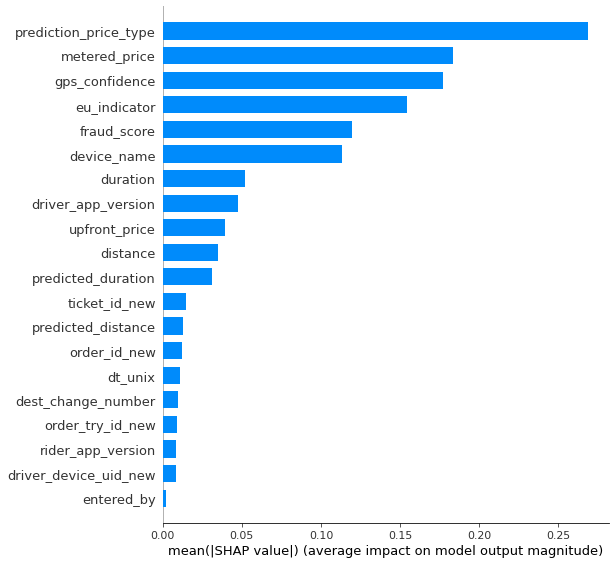

In [ ]:
shap.summary_plot(shap_values, train[X_col], plot_type="bar")


In [ ]:
df

,order_id_new,order_try_id_new,calc_created,metered_price,upfront_price,distance,duration,gps_confidence,entered_by,b_state,dest_change_number,prediction_price_type,predicted_distance,predicted_duration,change_reason_pricing,ticket_id_new,device_token,rider_app_version,order_state,order_try_state,driver_app_version,driver_device_uid_new,device_name,eu_indicator,overpaid_ride_ticket,fraud_score,metered_price_bin,fraud_bin,device_group,dur_bin
0,22,22,2020-02-02 03:37:31,4.04,10.0,2839,700,1,client,finished,1,upfront,13384.0,1091.0,NaN,1376,NaN,CI.4.17,finished,finished,DA.4.37,1596,Xiaomi Redmi 6,1,0,-1383.0,"(1.999, 4.72]","(-1850.0, -228.0]",xiaomi,"(517.0, 863.0]"
1,618,618,2020-02-08 02:26:19,6.09,3.6,5698,493,1,client,finished,1,upfront,2286.0,360.0,NaN,2035,NaN,CA.5.43,finished,finished,DA.4.39,1578,Samsung SM-G965F,1,0,-9999.0,"(4.72, 8.25]","(-14225.001, -9999.0]",samsung,"(-0.001, 517.0]"
2,657,657,2020-02-08 11:50:35,4.32,3.5,4426,695,1,client,finished,1,upfront,4101.0,433.0,NaN,2222,NaN,CA.5.43,finished,finished,DA.4.37,951,Samsung SM-A530F,1,0,-166.0,"(1.999, 4.72]","(-228.0, 49.0]",samsung,"(517.0, 863.0]"
3,313,313,2020-02-05 06:34:54,72871.72,NaN,49748,1400,0,client,finished,2,upfront_destination_changed,3017.0,600.0,client_destination_changed,1788,NaN,CA.5.23,finished,finished,DA.4.37,1587,TECNO-Y6,0,1,-9999.0,"(13835.1, 194483.52]","(-14225.001, -9999.0]",tecno,"(1304.0, 2241.2]"
4,1176,1176,2020-02-13 17:31:24,20032.50,19500.0,10273,5067,1,client,finished,1,upfront,14236.0,2778.0,NaN,2710,NaN,CA.5.04,finished,finished,DA.4.37,433,Itel W5504,0,0,-9999.0,"(13835.1, 194483.52]","(-14225.001, -9999.0]",misc,"(2241.2, 22402.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4938,3513,3513,2020-03-07 17:42:34,10.89,13.7,15672,1449,1,client,finished,1,upfront,16172.0,1691.0,NaN,517,NaN,CA.5.45,finished,finished,DA.4.37,1612,HUAWEI LYA-L29,1,0,-286.0,"(8.25, 6000.0]","(-1850.0, -228.0]",huawei,"(1304.0, 2241.2]"
4939,2192,2192,2020-02-22 18:15:45,8789.28,NaN,5712,1173,0,client,finished,1,prediction,5712.0,1093.0,NaN,3861,NaN,CA.5.44,finished,finished,DA.4.37,859,Samsung SM-G928F,0,0,-9999.0,"(6000.0, 13835.1]","(-14225.001, -9999.0]",samsung,"(863.0, 1304.0]"
4940,4051,4051,2020-03-12 23:08:31,7.50,7.4,5303,486,1,client,finished,1,upfront,5141.0,498.0,NaN,1156,NaN,CA.5.45,finished,finished,DA.4.42,2061,HUAWEI AMN-LX9,1,0,-192.0,"(4.72, 8.25]","(-228.0, 49.0]",huawei,"(-0.001, 517.0]"
4941,3636,3636,2020-03-08 20:15:04,3.06,8.1,3528,338,1,client,finished,1,upfront,8143.0,768.0,NaN,651,NaN,CA.5.46,finished,finished,DA.4.39,2101,TP-Link Neffos X1,1,0,-228.0,"(1.999, 4.72]","(-1850.0, -228.0]",misc,"(-0.001, 517.0]"


In [ ]:
[col for col in df.columns if 'price' in col]

['metered_price',
 'upfront_price',
 'prediction_price_type',
 'metered_price_bin']

In [ ]:
df['distance_err'] = df['distance'] - df['predicted_distance']

In [ ]:
df['duration_err'] = df['duration'] - df['predicted_duration']

In [ ]:
df['distance_err_pct'] = np.abs(df['distance_err'])/(df['distance'])
df['duration_err_pct'] = np.abs(df['duration_err'])/df['duration']

In [ ]:
df.replace([np.inf, -np.inf], np.nan)['distance_err_pct'].agg(['mean','median'])

mean      37.434295
median     0.163026
Name: distance_err_pct, dtype: float64

In [ ]:
df.replace([np.inf, -np.inf], np.nan)['duration_err_pct'].agg(['mean','median'])

mean      3.195506
median    0.279104
Name: duration_err_pct, dtype: float64

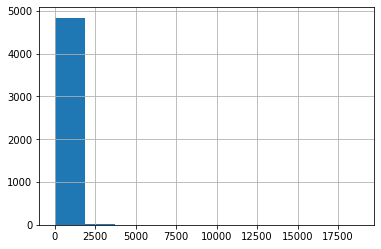

In [ ]:
df.replace([np.inf, -np.inf], np.nan)['distance_err_pct'].hist()

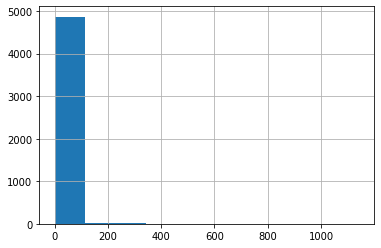

In [ ]:
df.replace([np.inf, -np.inf], np.nan)['duration_err_pct'].hist()

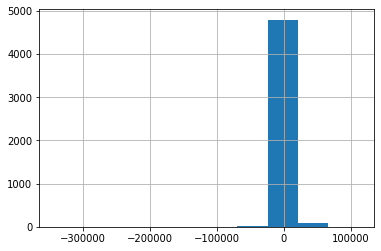

In [ ]:
df.replace([np.inf, -np.inf], np.nan)['distance_err'].hist()

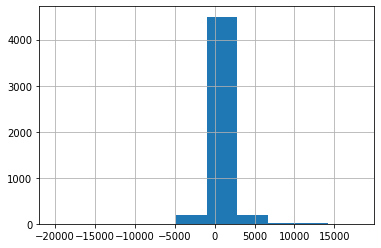

In [ ]:
df.replace([np.inf, -np.inf], np.nan)['duration_err'].hist()

In [ ]:
df['distance_err_bin'] = pd.qcut(df['distance_err'],5)

In [ ]:
df.groupby('distance_err_bin')[['overpaid_ride_ticket','upfront_price','metered_price']].agg(['count','mean'])

overpaid_ride_ticket  ... metered_price
                                     count  ...          mean
distance_err_bin                            ...              
(-341860.001, -754.8]                  985  ...   6481.735442
(-754.8, 0.0]                         1007  ...   5745.271192
(0.0, 581.4]                           962  ...   3210.857422
(581.4, 2466.0]                        984  ...   5552.151494
(2466.0, 112012.0]                     985  ...  18938.390640

[5 rows x 6 columns]

In [ ]:
df['duration_err_bin'] = pd.qcut(df['duration_err'],5)

In [ ]:
df.groupby('duration_err_bin')[['overpaid_ride_ticket','upfront_price','metered_price']].agg(['count','mean'])

overpaid_ride_ticket            ... metered_price              
                                    count      mean  ...         count          mean
duration_err_bin                                     ...                            
(-20081.001, -122.0]                  986  0.070994  ...           986   6989.042434
(-122.0, 34.0]                        988  0.033401  ...           988   1707.660152
(34.0, 257.0]                         982  0.027495  ...           982   3134.069287
(257.0, 845.0]                        983  0.090539  ...           983   8091.943194
(845.0, 18086.0]                      984  0.119919  ...           984  20087.473496

[5 rows x 6 columns]

In [ ]:
df

,order_id_new,order_try_id_new,calc_created,metered_price,upfront_price,distance,duration,gps_confidence,entered_by,b_state,dest_change_number,prediction_price_type,predicted_distance,predicted_duration,change_reason_pricing,ticket_id_new,device_token,rider_app_version,order_state,order_try_state,driver_app_version,driver_device_uid_new,device_name,eu_indicator,overpaid_ride_ticket,fraud_score,metered_price_bin,fraud_bin,device_group,dur_bin,distance_err,duration_err,distance_err_pct,duration_err_pct,distance_err_bin,duration_err_bin
0,22,22,2020-02-02 03:37:31,4.04,10.0,2839,700,1,client,finished,1,upfront,13384.0,1091.0,NaN,1376,NaN,CI.4.17,finished,finished,DA.4.37,1596,Xiaomi Redmi 6,1,0,-1383.0,"(1.999, 4.72]","(-1850.0, -228.0]",xiaomi,"(517.0, 863.0]",-10545.0,-391.0,3.714336,0.558571,"(-341860.001, -754.8]","(-20081.001, -122.0]"
1,618,618,2020-02-08 02:26:19,6.09,3.6,5698,493,1,client,finished,1,upfront,2286.0,360.0,NaN,2035,NaN,CA.5.43,finished,finished,DA.4.39,1578,Samsung SM-G965F,1,0,-9999.0,"(4.72, 8.25]","(-14225.001, -9999.0]",samsung,"(-0.001, 517.0]",3412.0,133.0,0.598807,0.269777,"(2466.0, 112012.0]","(34.0, 257.0]"
2,657,657,2020-02-08 11:50:35,4.32,3.5,4426,695,1,client,finished,1,upfront,4101.0,433.0,NaN,2222,NaN,CA.5.43,finished,finished,DA.4.37,951,Samsung SM-A530F,1,0,-166.0,"(1.999, 4.72]","(-228.0, 49.0]",samsung,"(517.0, 863.0]",325.0,262.0,0.073430,0.376978,"(0.0, 581.4]","(257.0, 845.0]"
3,313,313,2020-02-05 06:34:54,72871.72,NaN,49748,1400,0,client,finished,2,upfront_destination_changed,3017.0,600.0,client_destination_changed,1788,NaN,CA.5.23,finished,finished,DA.4.37,1587,TECNO-Y6,0,1,-9999.0,"(13835.1, 194483.52]","(-14225.001, -9999.0]",tecno,"(1304.0, 2241.2]",46731.0,800.0,0.939354,0.571429,"(2466.0, 112012.0]","(257.0, 845.0]"
4,1176,1176,2020-02-13 17:31:24,20032.50,19500.0,10273,5067,1,client,finished,1,upfront,14236.0,2778.0,NaN,2710,NaN,CA.5.04,finished,finished,DA.4.37,433,Itel W5504,0,0,-9999.0,"(13835.1, 194483.52]","(-14225.001, -9999.0]",misc,"(2241.2, 22402.0]",-3963.0,2289.0,0.385769,0.451747,"(-341860.001, -754.8]","(845.0, 18086.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4938,3513,3513,2020-03-07 17:42:34,10.89,13.7,15672,1449,1,client,finished,1,upfront,16172.0,1691.0,NaN,517,NaN,CA.5.45,finished,finished,DA.4.37,1612,HUAWEI LYA-L29,1,0,-286.0,"(8.25, 6000.0]","(-1850.0, -228.0]",huawei,"(1304.0, 2241.2]",-500.0,-242.0,0.031904,0.167012,"(-754.8, 0.0]","(-20081.001, -122.0]"
4939,2192,2192,2020-02-22 18:15:45,8789.28,NaN,5712,1173,0,client,finished,1,prediction,5712.0,1093.0,NaN,3861,NaN,CA.5.44,finished,finished,DA.4.37,859,Samsung SM-G928F,0,0,-9999.0,"(6000.0, 13835.1]","(-14225.001, -9999.0]",samsung,"(863.0, 1304.0]",0.0,80.0,0.000000,0.068201,"(-754.8, 0.0]","(34.0, 257.0]"
4940,4051,4051,2020-03-12 23:08:31,7.50,7.4,5303,486,1,client,finished,1,upfront,5141.0,498.0,NaN,1156,NaN,CA.5.45,finished,finished,DA.4.42,2061,HUAWEI AMN-LX9,1,0,-192.0,"(4.72, 8.25]","(-228.0, 49.0]",huawei,"(-0.001, 517.0]",162.0,-12.0,0.030549,0.024691,"(0.0, 581.4]","(-122.0, 34.0]"
4941,3636,3636,2020-03-08 20:15:04,3.06,8.1,3528,338,1,client,finished,1,upfront,8143.0,768.0,NaN,651,NaN,CA.5.46,finished,finished,DA.4.39,2101,TP-Link Neffos X1,1,0,-228.0,"(1.999, 4.72]","(-1850.0, -228.0]",misc,"(-0.001, 517.0]",-4615.0,-430.0,1.308107,1.272189,"(-341860.001, -754.8]","(-20081.001, -122.0]"
